In [12]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
parquet_file_path = 'dados_aerogerador.parquet'


df = pd.read_parquet(parquet_file_path)


In [14]:
print(df)
print(df.dtypes)

                 Timestamp  PotenciaAtv    VentoDir   VentoVel
0      2022-10-01 00:00:00     1.091987  182.549176   9.161274
1      2022-10-01 00:05:00     1.265452  180.455344  10.377114
2      2022-10-01 00:10:00     1.268950  184.665769  10.468931
3      2022-10-01 00:15:00     1.131952  185.472135   9.441942
4      2022-10-01 00:20:00     0.852821  181.995402   8.258044
...                    ...          ...         ...        ...
105115 2023-09-30 23:35:00     0.949050  181.090390   8.593109
105116 2023-09-30 23:40:00     1.042000  180.660817   9.014074
105117 2023-09-30 23:45:00     1.236008  180.956867   9.932471
105118 2023-09-30 23:50:00     1.318970  180.443739  10.775934
105119 2023-09-30 23:55:00     1.332789  181.480815  10.868448

[90677 rows x 4 columns]
Timestamp      datetime64[ns]
PotenciaAtv           float64
VentoDir              float64
VentoVel              float64
dtype: object


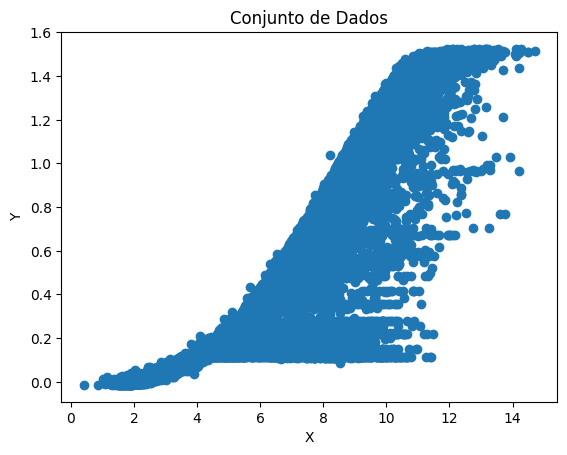

In [15]:
# Plotando o conjunto de dados
plt.scatter(df.VentoVel, df.PotenciaAtv)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Dados')
plt.show()

In [16]:
# Adicionando uma coluna de 1s (termo linear) ao DataFrame
del df['Timestamp']
df = sm.add_constant(df)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X_df = df.drop(
    "PotenciaAtv", axis=1
)  # Excluindo a coluna "Y" para obter as variáveis independentes (features)
Y_df = df.PotenciaAtv  # Definindo a variável dependente (target ou alvo)

# Criando o modelo de regressão linear
modelo = sm.OLS(Y_df, X_df).fit()

# Exibindo um resumo da análise de regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PotenciaAtv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 4.916e+05
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:28:32   Log-Likelihood:                 68145.
No. Observations:               90677   AIC:                        -1.363e+05
Df Residuals:                   90674   BIC:                        -1.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5246      0.014    -37.572      0.0